In [1]:
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [3]:
df=my_dataset['train'].to_pandas()

In [4]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [5]:
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_explode=df.explode('job_skills')

In [7]:
df_DA=df_explode[df_explode['job_title_short']=='Data Analyst']

In [10]:
skills_exploded=df_DA.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

In [15]:
skills_exploded=skills_exploded.sort_values(by='skill_count', ascending=False).head(20)

C:\Users\FAIZAN AKHTAR\AppData\Local\Temp\ipykernel_31980\4258817388.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


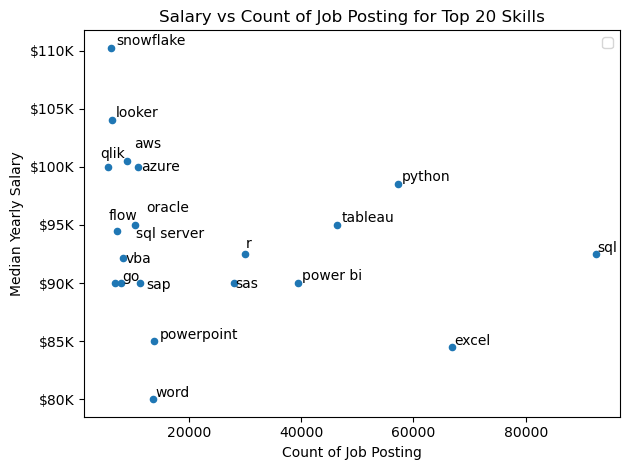

In [31]:
from adjustText import adjust_text
text=[]
skills_exploded.plot(kind='scatter', x='skill_count', y='median_salary')
for i, txt in enumerate(skills_exploded.index):
  
    text.append(plt.text(skills_exploded['skill_count'].iloc[i], skills_exploded['median_salary'].iloc[i], txt))
adjust_text(text)
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K' ))
plt.title('Salary vs Count of Job Posting for Top 20 Skills')
plt.xlabel('Count of Job Posting')
plt.ylabel('Median Yearly Salary')
plt.tight_layout()
plt.legend()
plt.show()